참고: https://datascienceschool.net/03%20machine%20learning/19.01%20%EB%AA%AC%ED%85%8C%EC%B9%B4%EB%A5%BC%EB%A1%9C%20%EB%B2%A0%EC%9D%B4%EC%A7%80%EC%95%88%20%EB%B6%84%EC%84%9D.html

# 목적: 분포함수 P(X)를 따르는 표본을 생성하자.

1. 균일분포
2. 역변환
3. Rejection Sampling
4. Importance Sampling

# 균일분포

In [8]:
import numpy as np
data = np.round(np.random.uniform(0,1,100),4)
print(f"mean = {np.mean(data)}, var = {np.var(data)}")
data

mean = 0.4562009999999999, var = 0.08816674069900002


array([0.2769, 0.05  , 0.3609, 0.7085, 0.6478, 0.0713, 0.4438, 0.8708,
       0.2298, 0.6593, 0.817 , 0.8268, 0.3339, 0.4098, 0.4088, 0.7778,
       0.5028, 0.5114, 0.4072, 0.6452, 0.6599, 0.0544, 0.9113, 0.4537,
       0.8654, 0.8649, 0.9899, 0.8232, 0.862 , 0.0167, 0.0474, 0.0614,
       0.9212, 0.2503, 0.1297, 0.1649, 0.0943, 0.6969, 0.0302, 0.2958,
       0.1979, 0.3236, 0.2023, 0.0623, 0.4867, 0.4787, 0.3709, 0.6874,
       0.0324, 0.0734, 0.8139, 0.1122, 0.7656, 0.7741, 0.0855, 0.2995,
       0.0442, 0.587 , 0.1283, 0.7907, 0.7129, 0.2218, 0.1572, 0.1762,
       0.4624, 0.9917, 0.0846, 0.2495, 0.9937, 0.1592, 0.5071, 0.1559,
       0.5878, 0.6611, 0.1381, 0.6372, 0.1258, 0.1571, 0.5748, 0.8325,
       0.8036, 0.4075, 0.0738, 0.4881, 0.92  , 0.4152, 0.6856, 0.9734,
       0.7623, 0.4444, 0.7186, 0.2891, 0.7579, 0.3164, 0.4426, 0.3853,
       0.2994, 0.9145, 0.0788, 0.3871])

# 역함수 변환(Inverse Transform)
* 방법론
1. 확률변수 X의 CDF인 Y를 정의한다.
2. FX(x) = y 를 x = F-1(y)형태로 표현한다.
3. 이때 Y는 U[0,1]을 따르므로, Uniform distribution에서 추출한 샘플들을 이에 대입한다.

http://aispiration.com/r-algorithm/inverse-transformation-sampling.html

참고: CDF가 U[0,1]을 따르는 이유

Let FY(y) be the CDF of Y=F(X). Then, for any y∈[0,1] we have: <br>
FY(y)=Pr[Y≤y]=Pr[F(X)≤y]=Pr[X≤F−1(y)]=F(F−1(y))=y. <br>
What distribution has this CDF?

https://math.stackexchange.com/questions/868400/showing-that-y-has-a-uniform-distribution-if-y-fx-where-f-is-the-cdf-of-contin

# Rejection Sampling
-> 위 두 방법은 P(X = x)가 Uniform 분포임을 알거나, 역함수를 구하는 것이 쉬운 경우에 해당한다. <br>
-> 만약 그렇지 않다면 우리는 Rejection Sampling을 수행하는 것이다.

In [13]:
import scipy as sp

In [20]:
a,b = 2,6
rv_p = sp.stats.beta(a,b) # 우리의 목표 분포
rv_q = sp.stats.norm(loc = 0.5, scale = 0.5) # 샘플링 가능한 유사 확률분포
k = 5

In [28]:
np.random.seed(0)
x_q0 = rv_q.rvs(int(1e4))


In [45]:
x_q = x_q0[(x_q0 >= 0) & (x_q0 <= 1)] # 아마 postive한 value만 갖는다고 정의가 있는 것으로 안다.
print(x_q.shape)
x_q

(6899,)


array([0.7000786 , 0.98936899, 0.01136106, ..., 0.52117941, 0.75843609,
       0.48353965])

In [38]:
crits = rv_p.pdf(x_q)/(rv_q.pdf(x_q) *k) # accpetance ratio
np.round(crits,4)

array([0.0194, 0.    , 0.1821, ..., 0.1382, 0.0075, 0.1872])

In [43]:
# Uniform으로 뽑기
coins = np.random.rand(len(x_q))

In [47]:
x_p = x_q[coins <= crits]
print(x_p.shape)
x_p

(2007,)


array([0.01136106, 0.44839057, 0.07295213, ..., 0.11279853, 0.44795971,
       0.52117941])

C:\Users\GyuSeokLee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GyuSeokLee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\GyuSeokLee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplo

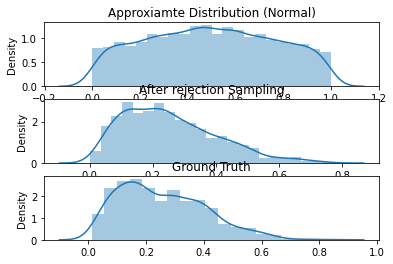

In [63]:
# 유사분포의 표본
import matplotlib.pyplot as plt
import seaborn as sns
plt.subplot(311)
sns.distplot(x_q)
plt.title("Approxiamte Distribution (Normal)")

plt.subplot(312)
sns.distplot(x_p)
plt.title("After rejection Sampling")

plt.subplot(313)
gt = rv_p.rvs(int(1e3))
sns.distplot(gt)
plt.title("Ground Truth")

plt.show()

# Importance Sampling
-> 위에서 설명된 Rejection Sampling에서 버리는 Sampling이 너무 많다.

In [69]:
print(f"Before:{len(x_q0)}")
print(f"After:{len(x_p)}")

Before:10000
After:2007


-> 만약 우리가 어떤 E[f(X)]를 구하려고 한다면 Importance Sampling을 사용할 수 있다.

In [73]:
# importance Sampling -> f(x) = x인 형태로 이해하면 됌.
np.mean(x_q0 * rv_p.pdf(x_q0) / rv_q.pdf(x_q0))

0.25391867593605905

In [74]:
# Rejection Sampling
np.mean(x_p)

0.2540840500720465

In [78]:
# Ground Truth
np.mean(rv_p.rvs(int(1e4)))

0.25242585725600675

# MC(마코프 체인)

* 주의: 
상태값이 K개의 유한한 값만 가질 수 있는 이산 상태(discrete-state) 시계열 확률과정에서 시간 t의 값 xt의 확률분포 p(xt)가 시간 t−1의 값의 확률분포 p(xt−1)과 조건부확률분포 p(xt|xt−1)에만 의존하면 이 시계열 확률과정을 마코프 체인(Markon chain)이라고 한다. 선형 체인 모양의 마코프 네트워크(linear chain Markov network)와는 전혀 다른 뜻이라는 점에 주의하라.



# MCMC(마코프체인 몬테카를로)
MCMC(Markov Chain Monte Carlo) 방법은 rejection sampling이나 importance sampling과 달리 마코프 체인을 이용하는 표본 생성 방법이다.

마코프 체인의 수렴분포가 원하는 분포 p(x)가 되도록 하는 마코프 체인을 만들고 이 마코프 체인을 t′ 시간 이상 가동하면 그 다음부터는 원하는 분포의 표본을 얻을 수 있다.

# Metropolis Algorithm
https://kjhov195.github.io/2019-12-09-metropolis_hastings/

원하는 분포(P)의 샘플을 얻기 위한 방법으로 MCMC의 초석이 되는 알고리즘이다.
1. 임의의 표본을 하나 만든다.(세타t)
2. transition kernel T(세타t프라임 | 세타t)을 이용해서 새로운 샘플, 세타t프라임을 추출한다.
3. P(세타t프라임) / P(세타t)를 통해 acceptance ratio를 구한다.
4. P = min(acceptance ratio, 1)의 확률로 세타t+1을 업데이트 한다. (이때 임의의 확률과 비교하기 위해 Uniform Distribution에서 확률을 하나 뽑아서 비교한다)

주의: Metropolis 알고리즘은 Symmetric kernel에서만 한정되어서 사용이 가능하다.

Symmetric kernel: T(θ∗|θ(t))=T(θ(t)|θ∗)

# Metropolis Hastings Algorithm
만약 Transition Kernel이 Symmetric하지 않은 경우에는 어떻게 할까?

Metropolis 알고리즘을 Non-Symmetric Transition Kernel case로 확장시킨 알고리즘이 바로 Metropolis Hastings 알고리즘이다.

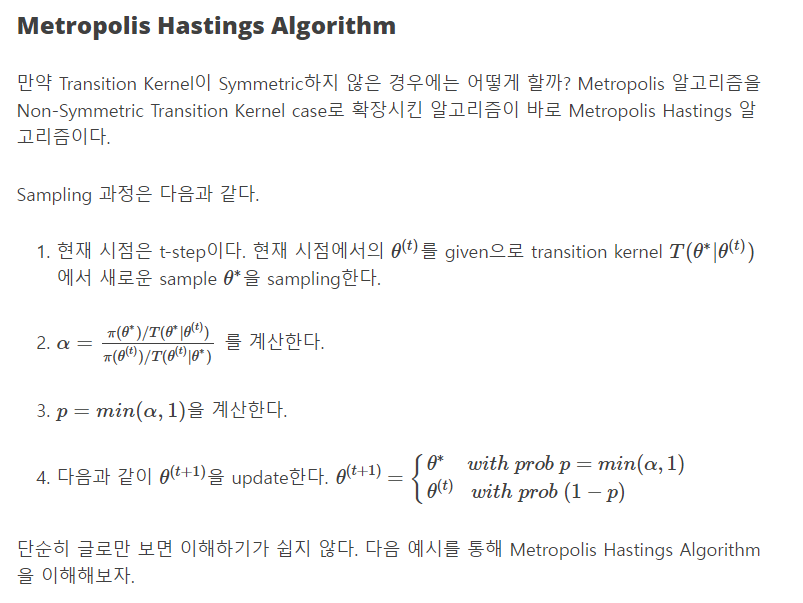

### 예제
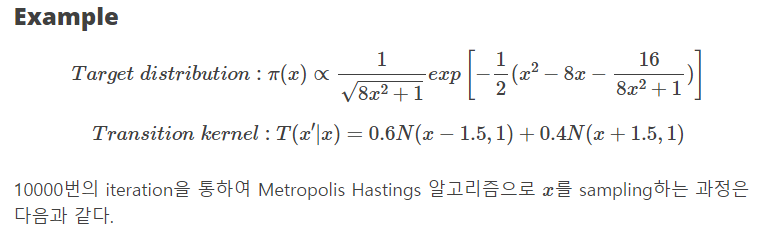


In [79]:
import numpy as np
import scipy.stats as stats

In [81]:
#1 target and Transition kernel define
def target_fn(x):
    return 1/(np.sqrt(8*(x**2)+1))*np.exp(-0.5*(x**2-8*x-16/(8*(x**2)+1)))

def transition_kernel(x, mu):
    d1 = 0.6*stats.norm.pdf(x, loc = mu - 1.5, scale = 1)
    d2 = 0.4*stats.norm.pdf(x, loc = mu + 1.5, scale = 1)
    return d1 + d2


In [85]:
#2 초기값 및 하이퍼 파라미터 설정(iter)
n_iter = 10000
n_accept = 0
x = np.zeros(n_iter+1)
x[0] = 1 # starting point

In [91]:
#3 metropolish hasting algorithm
for t in range(n_iter):
    x_t = x[t]
    
    if np.random.binomial(1, 0.6, 1):
        x_prime = np.random.normal(x_t - 1.5, 1, 1)
    else:
        x_prime = np.random.normal(x_t + 1.5, 1, 1)
    
    alpha = (target_fn(x_prime)/transition_kernel(x_prime, x_t)) / (target_fn(x_t)/transition_kernel(x_t, x_prime))
    
    runif = np.random.uniform(0,1,1)
    if runif <= alpha:
        x[t+1] = x_prime
        n_accept += 1
    else:
        x[t+1] = x_t

C:\Users\GyuSeokLee\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

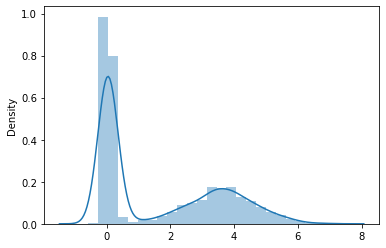

In [93]:
sns.distplot(x)

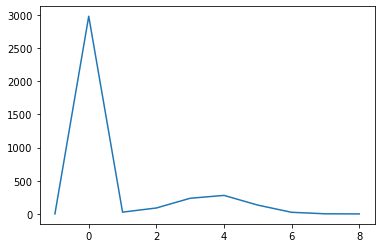

In [110]:
x = np.array(range(-1,9))
plt.plot(x,target_fn(x))